# GARCH Stock Forecasting

## Read Data

In [32]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [33]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [34]:
dis=pd.read_csv(r"SPX.csv", parse_dates=True)

In [35]:
dis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-25,1859.479980,1871.869995,1855.959961,1865.619995,1865.619995,3200560000
1,2014-03-26,1867.089966,1875.920044,1852.560059,1852.560059,1852.560059,3480850000
2,2014-03-27,1852.109985,1855.550049,1842.109985,1849.040039,1849.040039,3733430000
3,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000
4,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000
...,...,...,...,...,...,...,...
2512,2024-03-18,5154.770020,5175.600098,5145.470215,5149.419922,5149.419922,4036220000
2513,2024-03-19,5139.089844,5180.310059,5131.589844,5178.509766,5178.509766,4031760000
2514,2024-03-20,5181.689941,5226.189941,5171.549805,5224.620117,5224.620117,4064850000
2515,2024-03-21,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000


In [1]:
import statsmodels

In [36]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

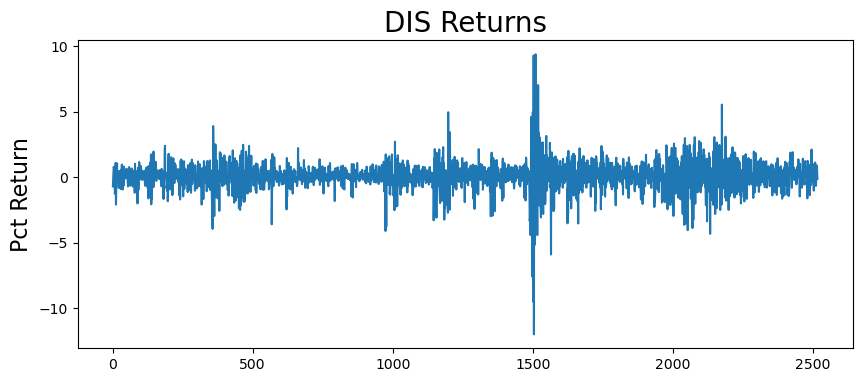

In [37]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

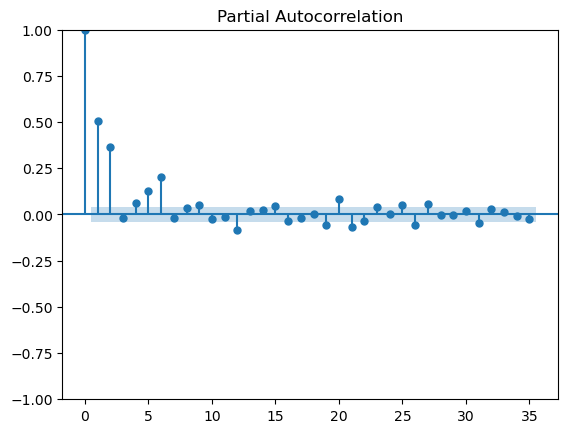

In [38]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [85]:
model = arch_model(returns, p=3, q=3)

In [86]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 15886.23719371191
Iteration:      2,   Func. Count:     24,   Neg. LLF: 12955.761958662464
Iteration:      3,   Func. Count:     37,   Neg. LLF: 4646.002781742635
Iteration:      4,   Func. Count:     47,   Neg. LLF: 5022.468975864862
Iteration:      5,   Func. Count:     58,   Neg. LLF: 4176.23405163741
Iteration:      6,   Func. Count:     68,   Neg. LLF: 4294.783115227074
Iteration:      7,   Func. Count:     79,   Neg. LLF: 3210.7121985145354
Iteration:      8,   Func. Count:     89,   Neg. LLF: 3222.514519064742
Iteration:      9,   Func. Count:     99,   Neg. LLF: 3186.1411490144183
Iteration:     10,   Func. Count:    109,   Neg. LLF: 3185.5285745216383
Iteration:     11,   Func. Count:    118,   Neg. LLF: 3185.6391261648478
Iteration:     12,   Func. Count:    128,   Neg. LLF: 3185.3949056491037
Iteration:     13,   Func. Count:    137,   Neg. LLF: 3185.362050582206
Iteration:     14,   Func. Count:    146,   Neg. LLF: 3185.

In [87]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3185.30
Distribution:                  Normal   AIC:                           6386.61
Method:            Maximum Likelihood   BIC:                           6433.25
                                        No. Observations:                 2516
Date:                Tue, Apr 23 2024   Df Residuals:                     2515
Time:                        14:16:14   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0827  1.445e-02      5.723  1.048e-08 [5.437e-02,  0.111]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0865  9.984e-02      0.866      0.386   [ -0.109,  0.282]
alpha[1]       0.2014  5.780e-02      3.485  4.930e-04 [8.812e-02,  0.315]
alpha[2]       0.1349      0.362      0.373      0.709   [ -0.574,  0.844]
alpha[3]       0.1176      0.156      0.756      0.449   [ -0.187,  0.423]
beta[1]    3.1136e-15      1.833  1.698e-15      1.000   [ -3.593,  3.593]
beta[2]        0.0000      0.472      0.000      1.000   [ -0.924,  0.924]
beta[3]        0.4806      1.235      0.389      0.697   [ -1.940,  2.901]
==========================================================================

Covariance estimator: robust
"""

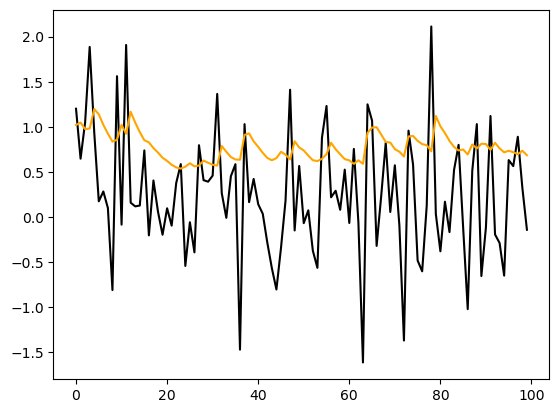

In [94]:
rolling_predictions = []
test_size = 500

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-500:])
x=list(rolling_predictions)
y=list(returns)
true, = plt.plot(y[-100:], color='black')
preds, = plt.plot(x[-100:], color='orange')

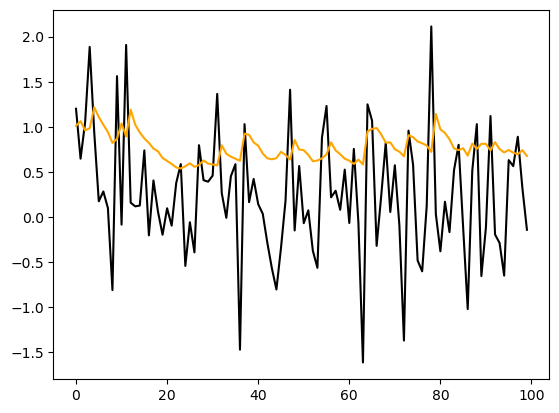

In [95]:
rolling_predictions = []
test_size = 500

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-500:])
x=list(rolling_predictions)
y=list(returns)
true, = plt.plot(y[-100:], color='black')
preds, = plt.plot(x[-100:], color='orange')

In [90]:
x=list(rolling_predictions)

In [91]:
y=list(returns)

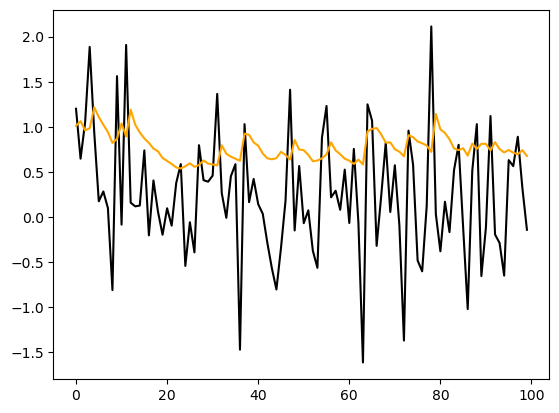

In [93]:

true, = plt.plot(y[-100:], color='black')
preds, = plt.plot(x[-100:], color='orange')

## Try GARCH(3,0) = ARCH(3)

In [14]:
model = arch_model(returns, p=3, q=0)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 24523.284261050587
Iteration:      2,   Func. Count:     17,   Neg. LLF: 359582.73107509303
Iteration:      3,   Func. Count:     24,   Neg. LLF: 31684.947664584328
Iteration:      4,   Func. Count:     31,   Neg. LLF: 35056.294054293765
Iteration:      5,   Func. Count:     38,   Neg. LLF: 5417.234318907851
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3812.615593118352
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3278.09816114323
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3277.1537699574565
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3266.6840248969656
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3265.3485775764
Iteration:     11,   Func. Count:     78,   Neg. LLF: 3265.1404226071218
Iteration:     12,   Func. Count:     84,   Neg. LLF: 3265.0750083027096
Iteration:     13,   Func. Count:     90,   Neg. LLF: 3265.039040476081
Iteration:     14,   Func. Count:     96,   Neg. LLF: 3265.

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3265.04
Distribution:                  Normal   AIC:                           6540.07
Method:            Maximum Likelihood   BIC:                           6569.22
                                        No. Observations:                 2516
Date:                Tue, Apr 23 2024   Df Residuals:                     2515
Time:                        10:44:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0895  1.523e-02      5.874  4.250e-09 [5.961e-02,  0.119]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2889  3.091e-02      9.345  9.148e-21 [  0.228,  0.349]
alpha[1]       0.2697  4.854e-02      5.556  2.761e-08 [  0.175,  0.365]
alpha[2]       0.2758  3.842e-02      7.177  7.141e-13 [  0.200,  0.351]
alpha[3]       0.2747  4.607e-02      5.964  2.459e-09 [  0.184,  0.365]
========================================================================

Covariance estimator: robust
"""

In [17]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [18]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

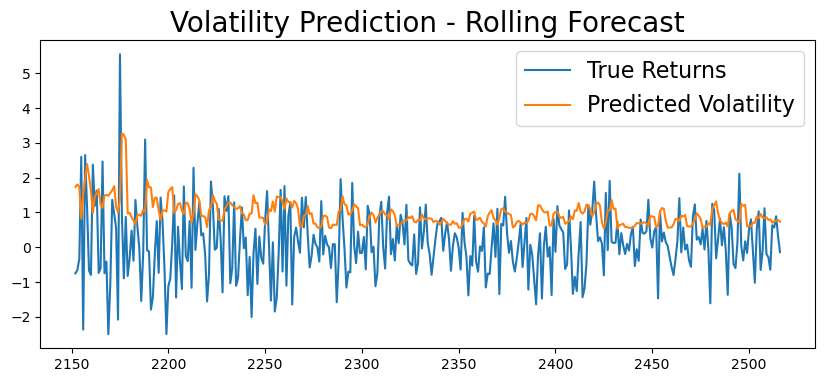

In [19]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

## PACF

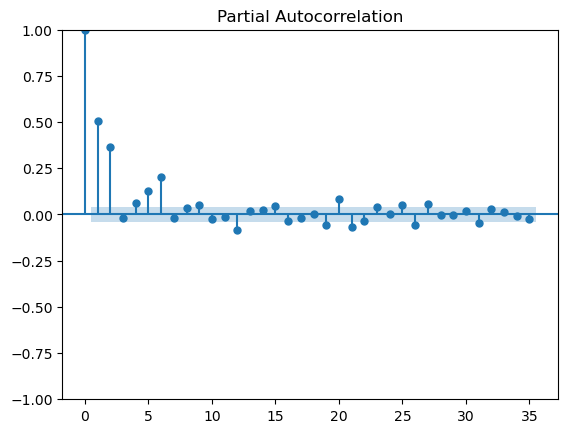

In [20]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [21]:
model = arch_model(returns, p=2, q=2)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 16845.88178855693
Iteration:      2,   Func. Count:     20,   Neg. LLF: 12593.07297290678
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5172.425281979375
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4349.418850482081
Iteration:      5,   Func. Count:     48,   Neg. LLF: 3458.191774183725
Iteration:      6,   Func. Count:     57,   Neg. LLF: 3184.935072209226
Iteration:      7,   Func. Count:     64,   Neg. LLF: 3185.5365594421273
Iteration:      8,   Func. Count:     73,   Neg. LLF: 3184.7883992211073
Iteration:      9,   Func. Count:     80,   Neg. LLF: 3184.7803080706763
Iteration:     10,   Func. Count:     87,   Neg. LLF: 3184.779906381971
Iteration:     11,   Func. Count:     94,   Neg. LLF: 3184.779893828533
Iteration:     12,   Func. Count:    101,   Neg. LLF: 3184.779890160289
Iteration:     13,   Func. Count:    107,   Neg. LLF: 3184.77989016023
Optimization terminated successfully    (Exit mode 0)
        

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3184.78
Distribution:                  Normal   AIC:                           6381.56
Method:            Maximum Likelihood   BIC:                           6416.54
                                        No. Observations:                 2516
Date:                Tue, Apr 23 2024   Df Residuals:                     2515
Time:                        10:44:47   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0812  1.447e-02      5.612  1.998e-08 [5.283e-02,  0.110]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0675  1.674e-02      4.033  5.498e-05 [3.471e-02,  0.100]
alpha[1]       0.1767  3.536e-02      4.997  5.828e-07   [  0.107,  0.246]
alpha[2]       0.1726  3.394e-02      5.086  3.654e-07   [  0.106,  0.239]
beta[1]        0.0000  8.532e-02      0.000      1.000   [ -0.167,  0.167]
beta[2]        0.5995  6.735e-02      8.901  5.532e-19   [  0.467,  0.731]
==========================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [24]:
rolling_predictions = []
test_size = 500

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [25]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-500:])

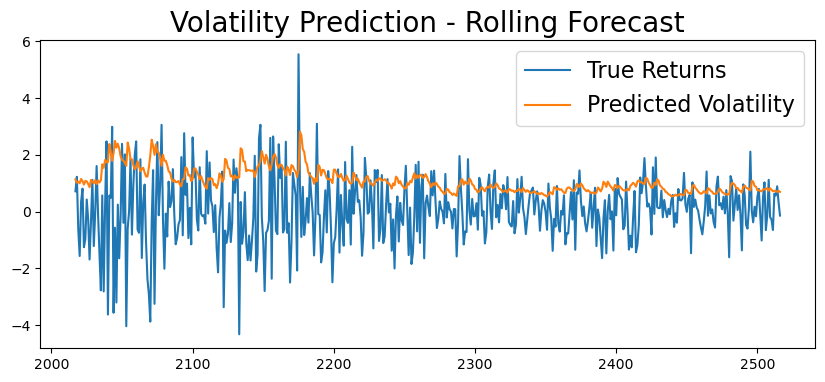

In [26]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-500:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [27]:
df=pd.DataFrame(dis)

In [28]:
df['Return']=(df['Close']-df['Open'])*100/(df['Open'])
y=df['Return']

In [30]:
x=list(data_std)